In [5]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/zyq0416/workspace/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
import matplotlib.pyplot as plt
import json

from pyBraytonHeatPump import BraytonHeatPump

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


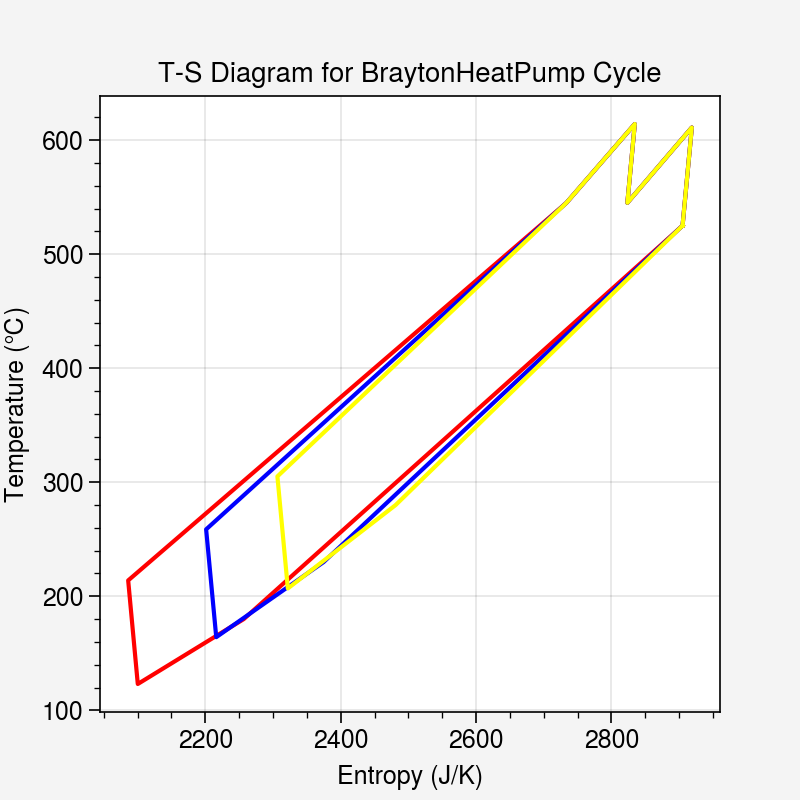

In [6]:
parameters = {}
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["isentropic_eff_mc"] = 0.88  #等熵效率
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
parameters["min_temperature_exchange"] = 20
#parameters["industrial_waste_heat_t"] =200 #℃
parameters["heat_transfer_loss_eff"] = 0.96
parameters["t_reaction"] = 525

parameters["p_bray_L"] = 7.5e6
parameters["T_amb"] = 20
parameters["p_amb"] = 101325
parameters11 = {
    "industrial_waste_heat_t": [200, 250, 300]  # 修改参数为一个包含三个值的列表
}

colors = ['red', 'blue', 'yellow']  # 设置不同的颜色

plt.xlabel('Entropy (J/K)')
plt.ylabel('Temperature (℃)')
plt.title('T-S Diagram for BraytonHeatPump Cycle')

for i, waste_heat_t in enumerate(parameters11["industrial_waste_heat_t"]):
    parameters["industrial_waste_heat_t"] = waste_heat_t
    bh = BraytonHeatPump(parameters)
    results = bh.solve(input)

    # 提取结果中的数据
    T1 = results["primary_compressor"]["t_compressor_in"]
    S1 = results["primary_compressor"]["s_compressor_in"]
    T2 = results["primary_compressor"]["t_compressor_out"]
    S2 = results["primary_compressor"]["s_compressor_out"]
    T3 = results["primary_h_exchanger"]["t_h_exchanger_out"]
    S3 = results["primary_h_exchanger"]["s_h_exchanger_out"]
    T4 = results["secondary_compressor"]["t_compressor_out"]
    S4 = results["secondary_compressor"]["s_compressor_out"]
    T5 = results["secondary_h_exchanger"]["t_h_exchanger_out"]
    S5 = results["secondary_h_exchanger"]["s_h_exchanger_out"]
    T6 = results["mian_h_exchanger"]["t_h_exchangerm_hh_out"]
    S6 = results["mian_h_exchanger"]["s_h_exchangerm_hh_out"]
    T7 = results["turbine"]["t_turbine_out"]
    S7 = results["turbine"]["s_turbine_out"]
    T8 = results["heat_recovery"]["t_heat_recovery_out"]
    S8 = results["heat_recovery"]["s_heat_recovery_out"]
    T9 = results["mian_h_exchanger"]["t_h_exchangerm_ll_in"]
    S9 = results["mian_h_exchanger"]["s_h_exchangerm_ll_in"]

    points = [(S1, T1), (S2, T2), (S3, T3), (S4, T4), (S5, T5),
            (S6, T6), (S7, T7), (S8, T8), (S9, T9)]

    # 添加第一个点到最后，形成闭合图像
    points.append(points[0])

    # 提取S和T的值
    S = [point[0] for point in points]
    T = [point[1] for point in points]

    # 绘制图像，并设置颜色
    plt.plot(S, T, color=colors[i])

plt.show()